In [ ]:
# Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# For better visualization
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the COVID-19 dataset from local file assuming the CSV file is in my current working directory
file_path = "owid-covid-data.csv"  
try:
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    print("Please ensure the CSV file is in your current working directory.")
    print("If the file has a different name, update the 'file_path' variable.")
except Exception as e:
    print(f"Error loading file: {e}")

Data loaded successfully! Shape: (350085, 67)


In [3]:
# Check the columns in our dataset
print("\nColumns in the dataset:")
print(df.columns.tolist())

# Preview the first few rows
print("\nPreview of the data:")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Basic information about the dataset
print("\nDataset info:")
df.info()

# Statistical summary
print("\nStatistical summary:")
display(df.describe())


Columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccina

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN



Missing values per column:
weekly_icu_admissions                      339880
weekly_icu_admissions_per_million          339880
excess_mortality_cumulative_per_million    337901
excess_mortality                           337901
excess_mortality_cumulative                337901
                                            ...  
new_deaths_smoothed                         10804
new_cases_per_million                        9628
new_cases                                    9628
new_deaths_per_million                       9574
new_deaths                                   9574
Length: 63, dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.120880e+05,3.404570e+05,3.391980e+05,2.905010e+05,340511.000000,339281.000000,312088.000000,340457.000000,339198.000000,290501.000000,...,200889.000000,132973.000000,239669.000000,322072.000000,263138.000000,3.500850e+05,1.218400e+04,12184.000000,12184.000000,12184.000000
mean,6.683354e+06,9.601634e+03,9.637066e+03,8.602180e+04,85.511055,85.817071,101749.851259,145.163814,145.696924,872.289356,...,32.909483,50.789962,3.097245,73.713631,0.722464,1.284633e+08,5.281637e+04,9.738648,11.345256,1669.025575
std,4.068903e+07,1.102769e+05,9.447784e+04,4.398873e+05,613.687971,559.130004,151265.689121,1163.714678,599.957847,1100.189784,...,13.573767,31.956100,2.548327,7.395220,0.148976,6.607694e+08,1.492195e+05,12.304441,25.181297,1938.556228
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,8.090000e+03,0.000000e+00,2.860000e-01,1.270000e+02,0.000000,0.000000,2595.577500,0.000000,0.044000,60.606000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.202250e+02,1.400000,-1.600000,72.395046
50%,7.020500e+04,2.000000e+00,2.485700e+01,1.328000e+03,0.000000,0.143000,28307.659000,0.128000,6.517000,377.169000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.885850e+03,8.075000,5.720000,1105.404700
75%,7.409558e+05,2.640000e+02,4.978570e+02,1.192200e+04,3.000000,5.143000,133506.244000,35.466000,82.411000,1365.925000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.742344e+04,15.360000,16.302500,2740.130200
max,7.714071e+08,8.401961e+06,6.402036e+06,6.972139e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,6511.209000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000


In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
print("Date column converted to datetime format")

# Filter for countries of interest (Kenya, USA, India) and relevant columns
countries_of_interest = ['Kenya', 'United States', 'India']
selected_columns = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 
                   'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated',
                   'people_fully_vaccinated', 'population']

# Filter the dataframe
filtered_df = df[df['location'].isin(countries_of_interest)][selected_columns]
print(f"\nFiltered data for selected countries: {filtered_df['location'].unique()}")
print(f"Shape of filtered data: {filtered_df.shape}") #no. of rows and columns

Date column converted to datetime format

Filtered data for selected countries: ['India' 'Kenya' 'United States']
Shape of filtered data: (4160, 12)


In [ ]:
# Handle missing values in key columns
# For critical columns, we'll use forward fill for each country separately
critical_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']

cleaned_df = filtered_df.copy() #copy is created to avoid modifying the original dataframe

# Forward fill missing values for critical columns
for country in countries_of_interest:
    country_mask = cleaned_df['location'] == country # Create a mask for the current country
    
    # Forward fill missing values within each country's data
    cleaned_df.loc[country_mask, critical_cols] = cleaned_df.loc[country_mask, critical_cols].fillna(method='ffill')

# For vaccination data, we'll use forward fill as vaccines don't decrease
vaccine_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
for country in countries_of_interest:
    country_mask = cleaned_df['location'] == country
    cleaned_df.loc[country_mask, vaccine_cols] = cleaned_df.loc[country_mask, vaccine_cols].fillna(method='ffill')

# Replace remaining NaNs with 0s for new cases/deaths as these could be truly zero
cleaned_df[['new_cases', 'new_deaths']] = cleaned_df[['new_cases', 'new_deaths']].fillna(0)

# Check remaining missing values
print("\nRemaining missing values after cleaning:")
missing_after = cleaned_df.isnull().sum()
missing_after = missing_after[missing_after > 0].sort_values(ascending=False)
print(missing_after)

# Create a clean dataset with complete records for our analysis
final_df = cleaned_df.dropna(subset=['total_cases', 'total_deaths', 'population'])
print(f"\nFinal dataset shape after cleaning: {final_df.shape}")


Remaining missing values after cleaning:
people_fully_vaccinated    1266
total_vaccinations         1149
people_vaccinated          1149
total_deaths                211
total_cases                 115
dtype: int64

Final dataset shape after cleaning: (3949, 12)


In [6]:
# Calculate additional metrics
final_df['death_rate'] = (final_df['total_deaths'] / final_df['total_cases'] * 100).round(2)
final_df['cases_per_million'] = (final_df['total_cases'] / final_df['population'] * 1000000).round(2)
final_df['deaths_per_million'] = (final_df['total_deaths'] / final_df['population'] * 1000000).round(2)

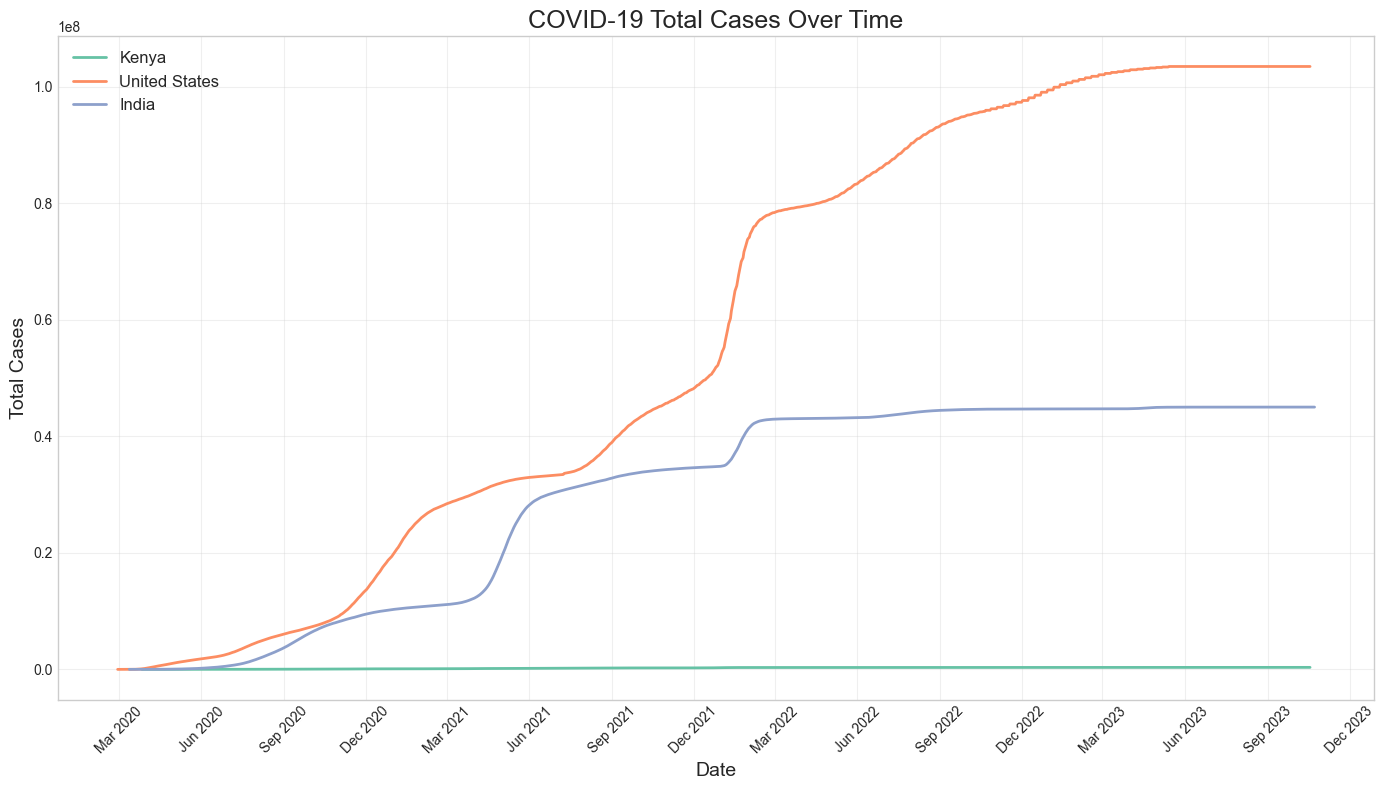

In [7]:
# 1. Plot total cases over time for selected countries
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = final_df[final_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], linewidth=2, label=country)

plt.title('COVID-19 Total Cases Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

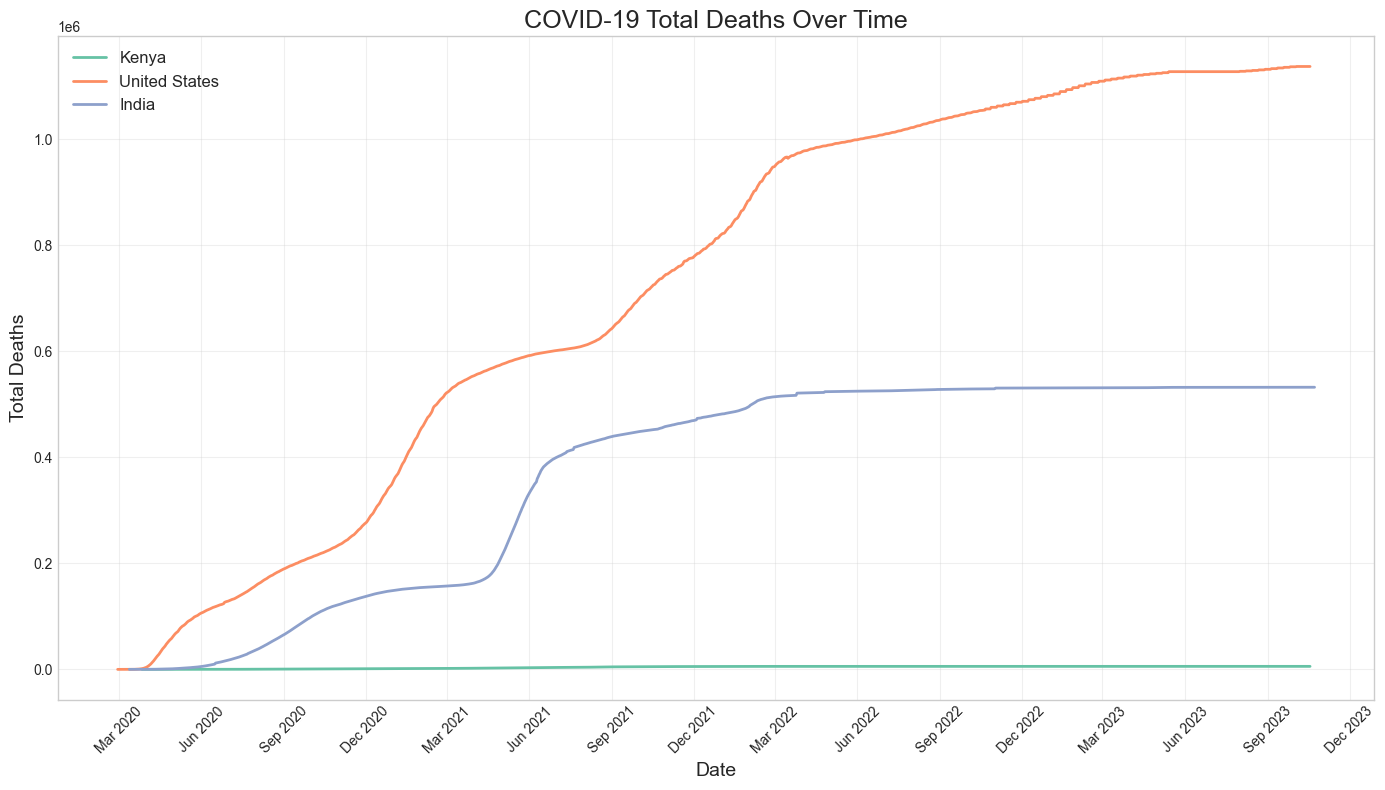

In [8]:
# 2. Plot total deaths over time
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = final_df[final_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], linewidth=2, label=country)

plt.title('COVID-19 Total Deaths Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

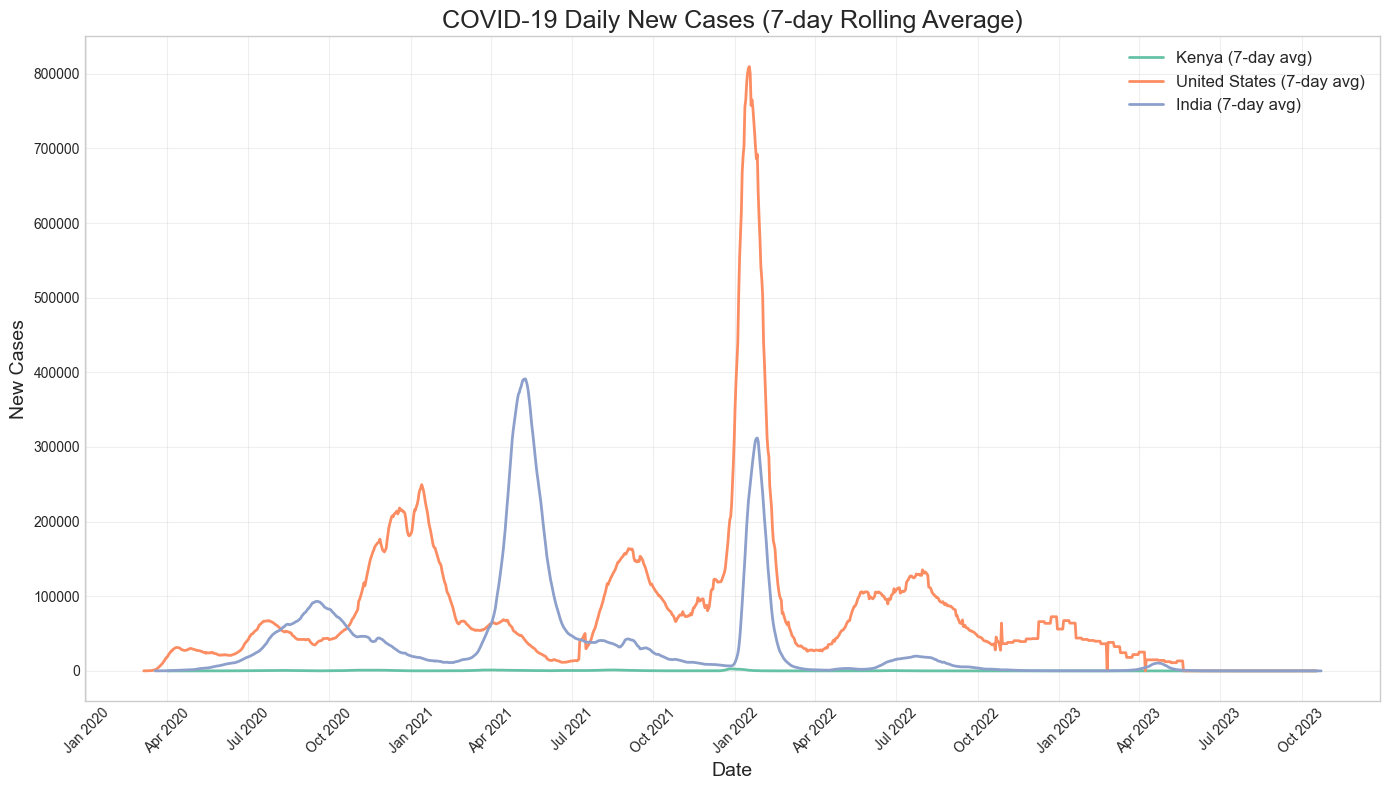

In [ ]:
# 3. Plot daily new cases using a 7-day rolling average to smooth the curve
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = final_df[final_df['location'] == country]

    # Calculate 7-day rolling average
    rolling_new_cases = country_data['new_cases'].rolling(window=7).mean()
    plt.plot(country_data['date'], rolling_new_cases, linewidth=2, label=f"{country} (7-day avg)")

plt.title('COVID-19 Daily New Cases (7-day Rolling Average)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

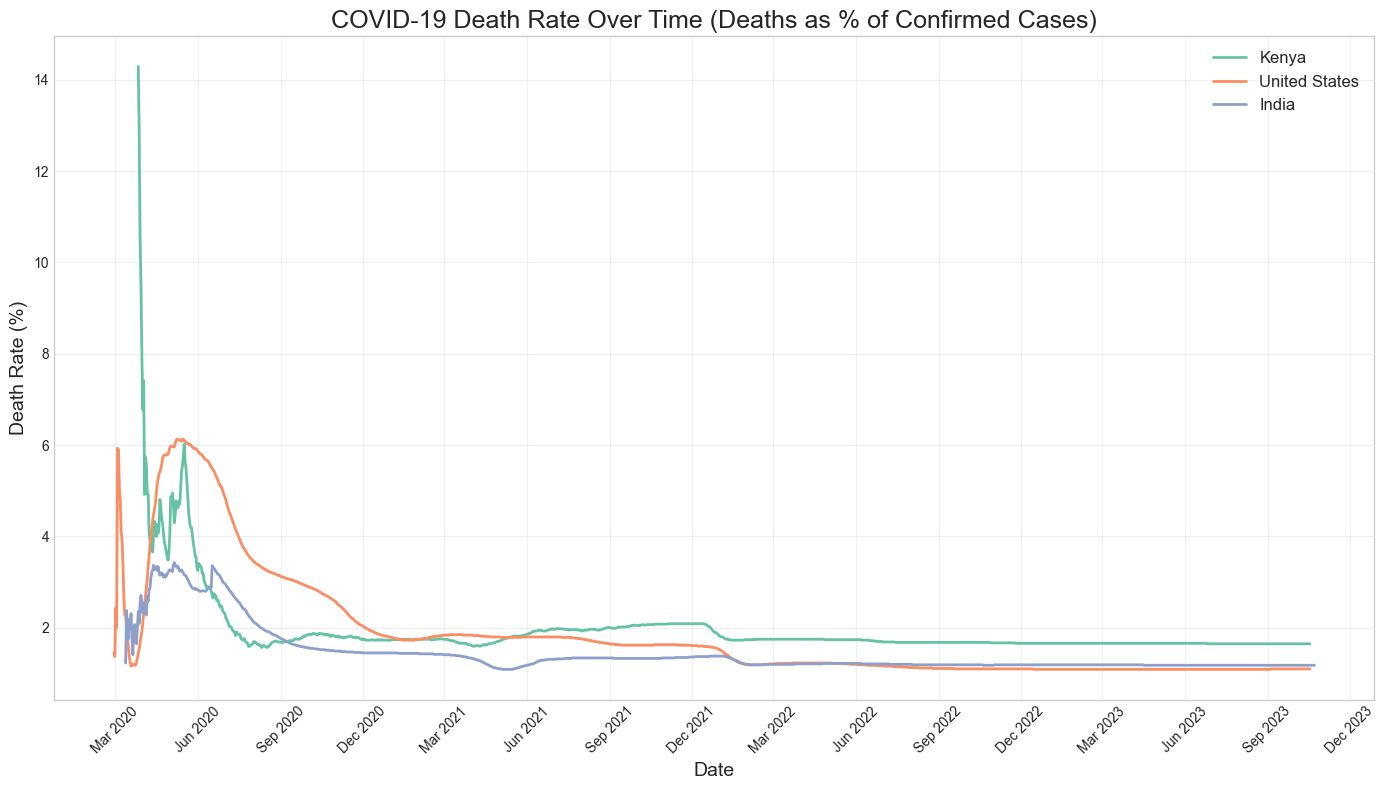

In [10]:
# 4. Compare death rates between countries
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = final_df[final_df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], linewidth=2, label=country)

plt.title('COVID-19 Death Rate Over Time (Deaths as % of Confirmed Cases)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Death Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

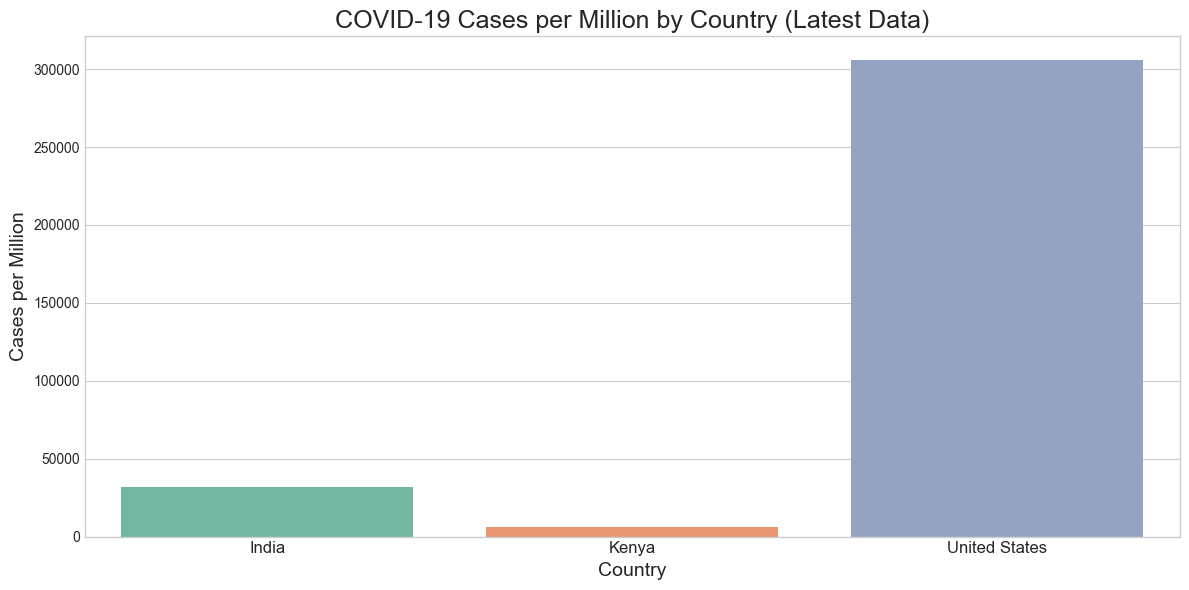

In [11]:
# 5. Bar chart: Compare cases and deaths per million (latest data)
latest_data = final_df.groupby('location').last().reset_index()

# Cases per million
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='cases_per_million', data=latest_data, palette="Set2")
plt.title('COVID-19 Cases per Million by Country (Latest Data)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Cases per Million', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

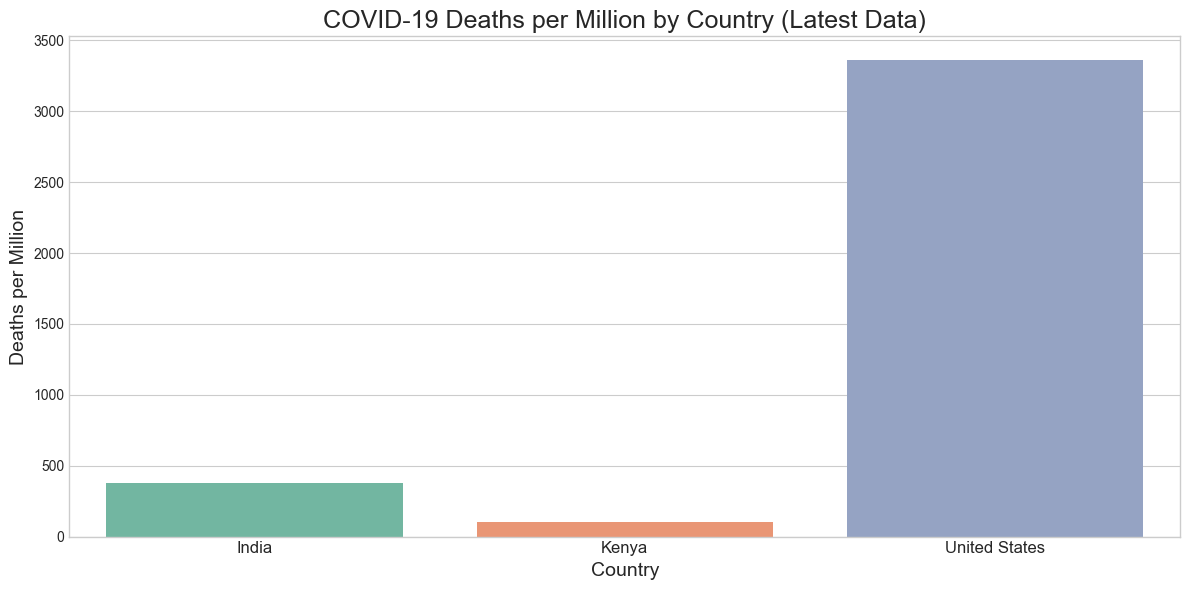

In [12]:
# Deaths per million
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='deaths_per_million', data=latest_data, palette="Set2")
plt.title('COVID-19 Deaths per Million by Country (Latest Data)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Deaths per Million', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

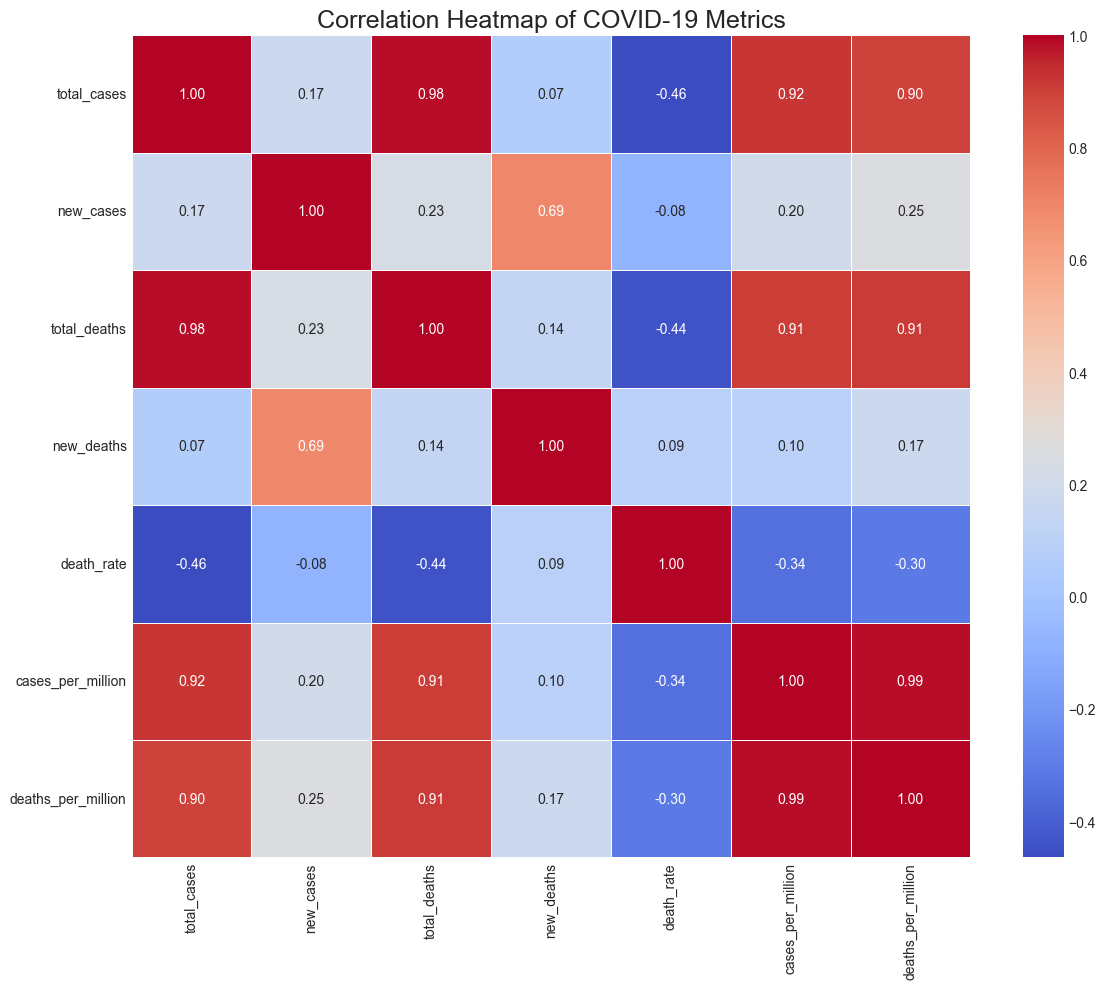

In [13]:
# 6. Correlation heatmap for numerical variables
plt.figure(figsize=(12, 10))
numerical_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'death_rate',
                 'cases_per_million', 'deaths_per_million']
correlation_data = final_df[numerical_cols].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of COVID-19 Metrics', fontsize=18)
plt.tight_layout()
plt.show()

In [14]:
# Filter out rows with missing vaccination data
vaccination_df = final_df.dropna(subset=['total_vaccinations'])

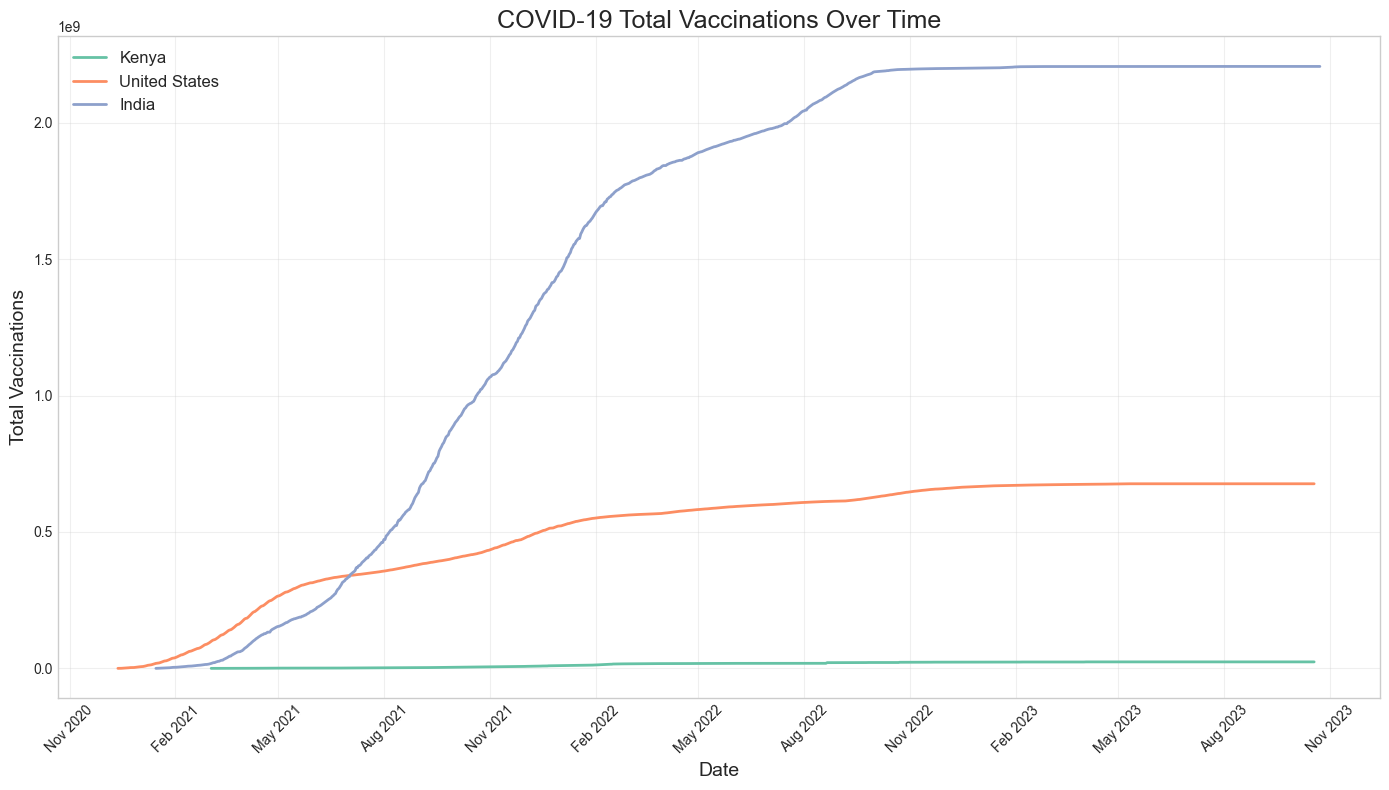

In [15]:
# 1. Plot total vaccinations over time
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = vaccination_df[vaccination_df['location'] == country]
    if not country_data.empty:  # Check if we have vaccination data for this country
        plt.plot(country_data['date'], country_data['total_vaccinations'], linewidth=2, label=country)

plt.title('COVID-19 Total Vaccinations Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

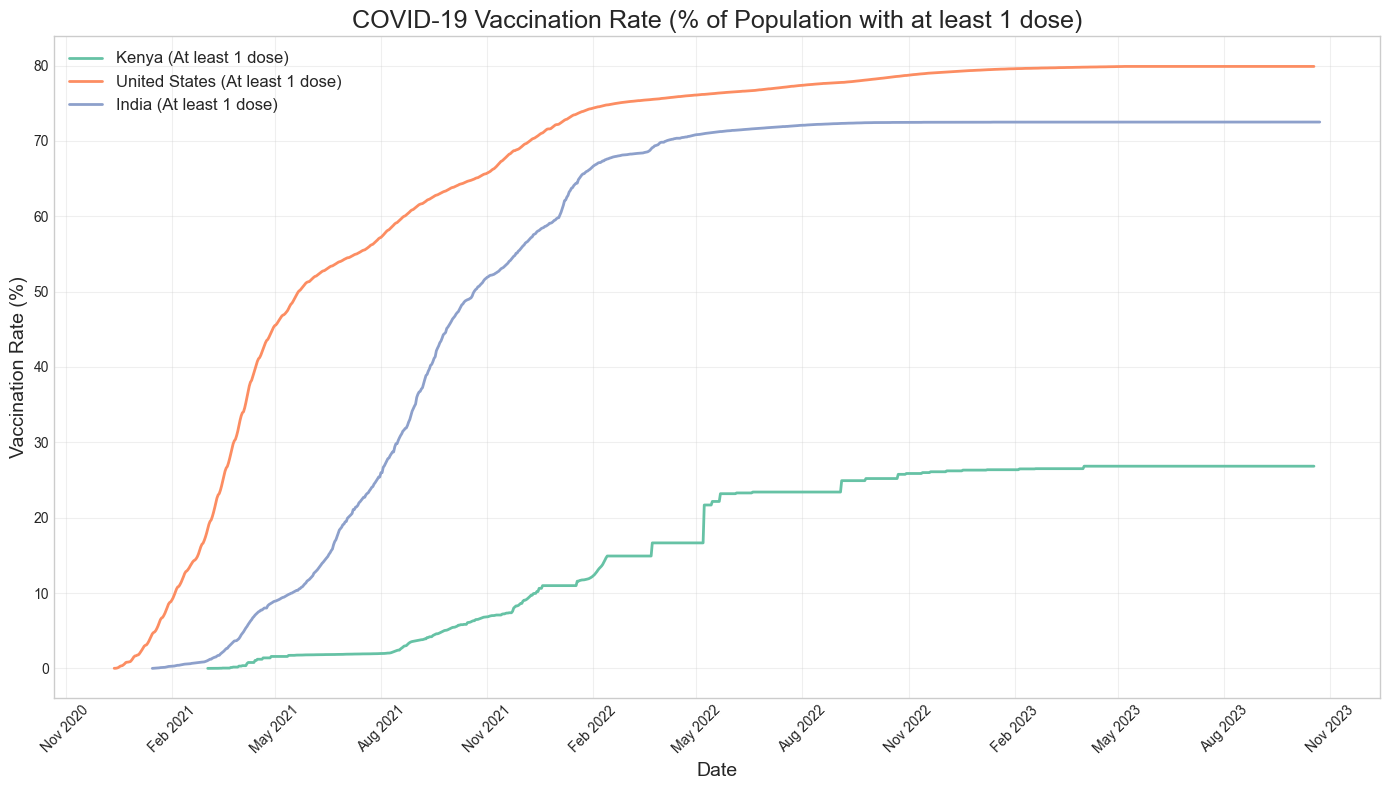

In [16]:
# 2. Calculate and plot vaccination rates (% of population)
vaccination_df['vaccination_rate'] = (vaccination_df['people_vaccinated'] / vaccination_df['population'] * 100).round(2)
vaccination_df['fully_vaccinated_rate'] = (vaccination_df['people_fully_vaccinated'] / vaccination_df['population'] * 100).round(2)

# Plot vaccination rates
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = vaccination_df[vaccination_df['location'] == country]
    if not country_data.empty and 'vaccination_rate' in country_data.columns:
        plt.plot(country_data['date'], country_data['vaccination_rate'], linewidth=2, label=f"{country} (At least 1 dose)")

plt.title('COVID-19 Vaccination Rate (% of Population with at least 1 dose)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Vaccination Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

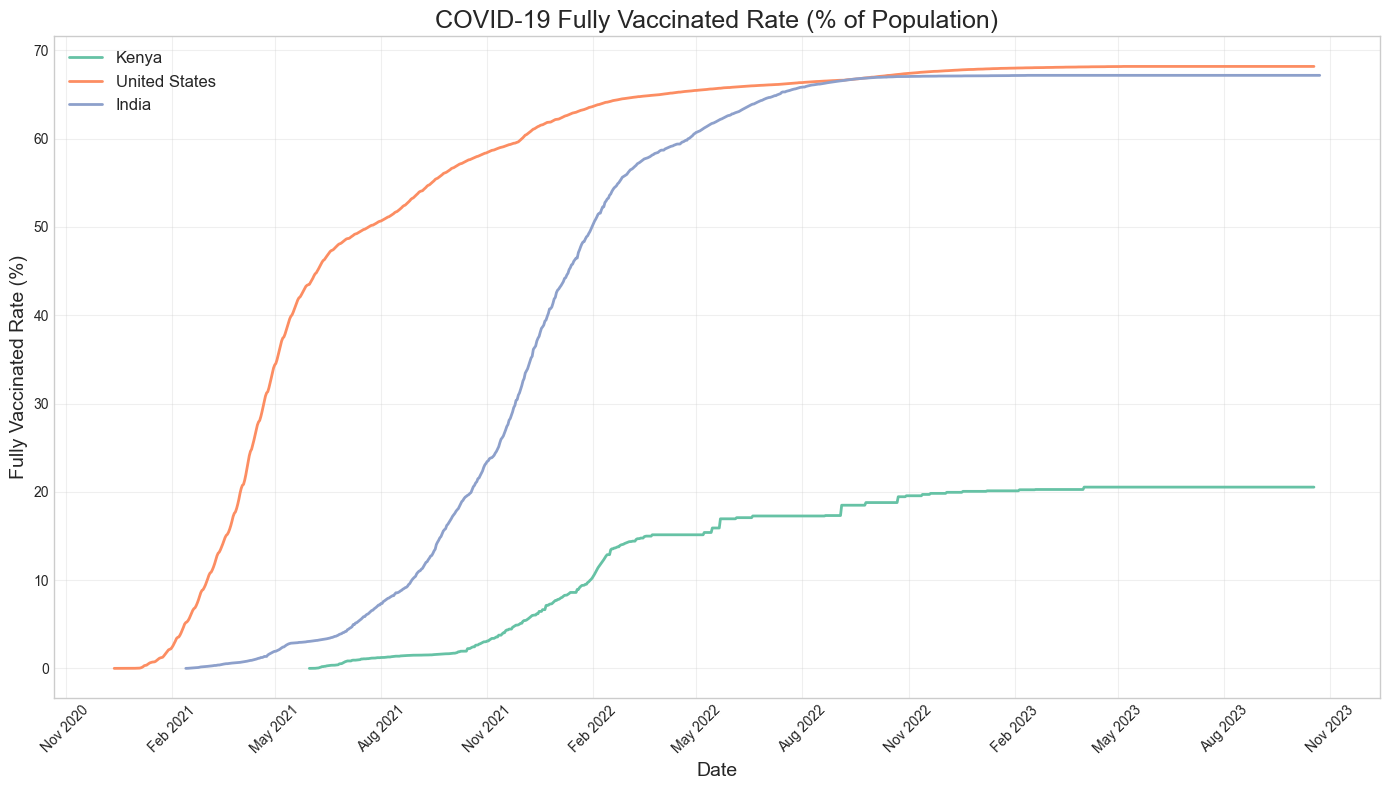

In [17]:
# Plot fully vaccinated rates
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = vaccination_df[vaccination_df['location'] == country]
    if not country_data.empty and 'fully_vaccinated_rate' in country_data.columns:
        plt.plot(country_data['date'], country_data['fully_vaccinated_rate'], linewidth=2, label=country)

plt.title('COVID-19 Fully Vaccinated Rate (% of Population)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Fully Vaccinated Rate (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# Format date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

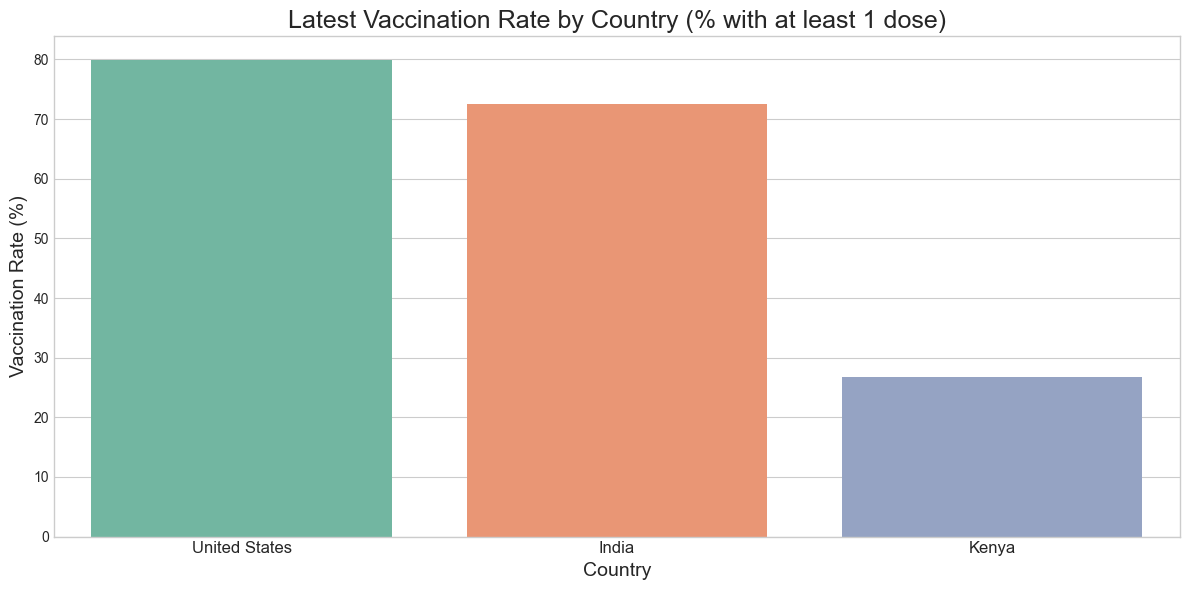

In [18]:
# 3. Bar chart comparing latest vaccination rates
latest_vax_data = vaccination_df.groupby('location').last().reset_index()

plt.figure(figsize=(12, 6))
latest_vax_data_sorted = latest_vax_data.sort_values('vaccination_rate', ascending=False)
sns.barplot(x='location', y='vaccination_rate', data=latest_vax_data_sorted, palette="Set2")
plt.title('Latest Vaccination Rate by Country (% with at least 1 dose)', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Vaccination Rate (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

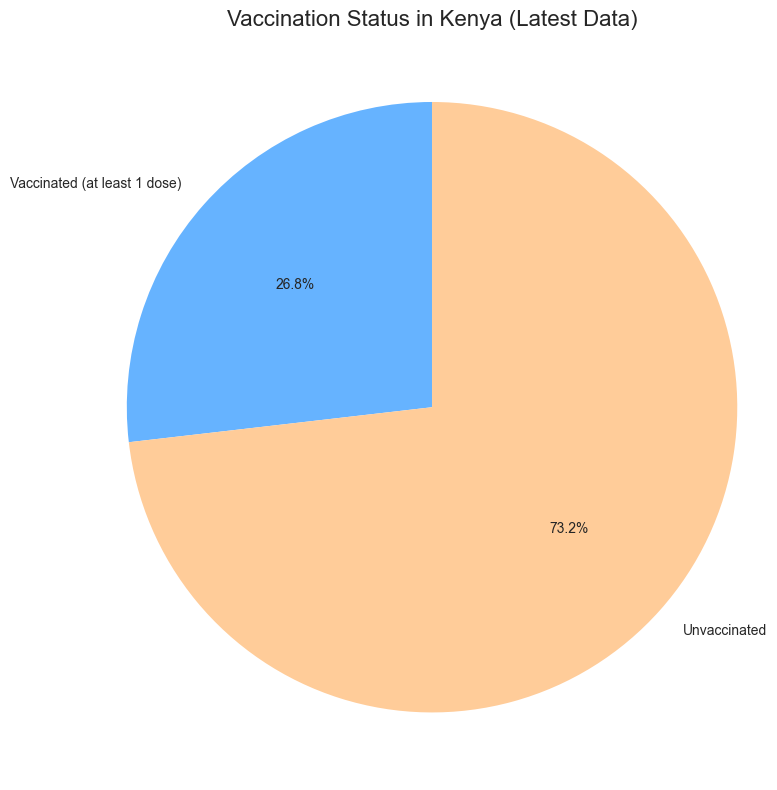

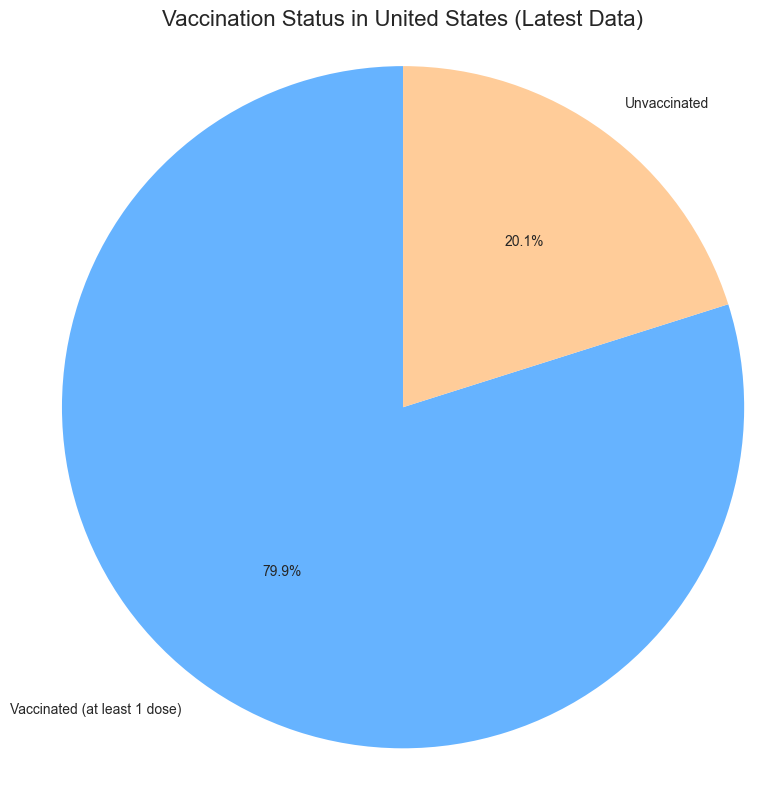

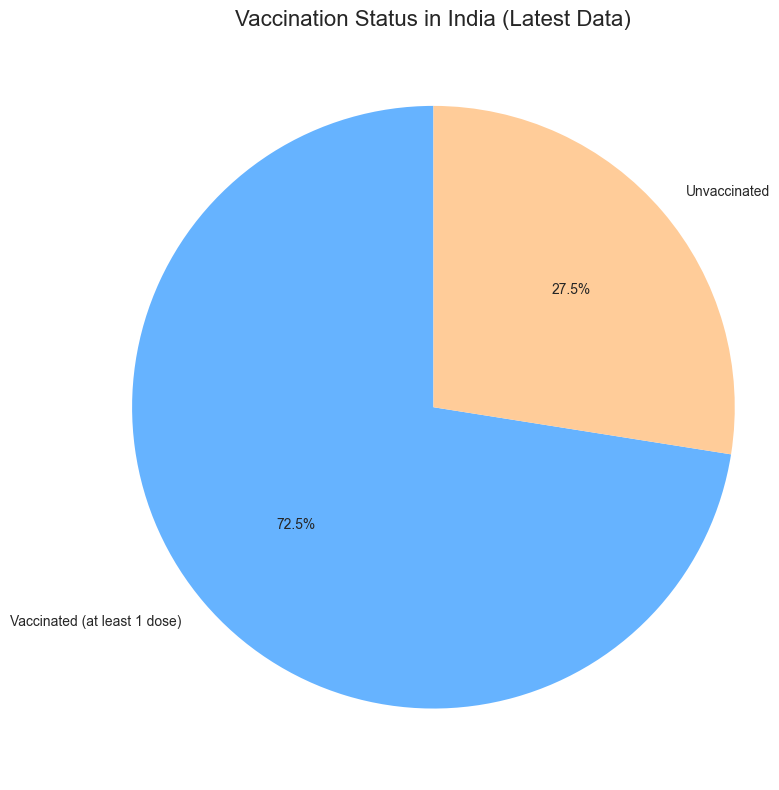

In [19]:
# 4. Pie charts for vaccinated vs. unvaccinated population
for country in countries_of_interest:
    country_latest = latest_vax_data[latest_vax_data['location'] == country]
    if not country_latest.empty and 'vaccination_rate' in country_latest.columns:
        vax_rate = country_latest['vaccination_rate'].values[0]
        if pd.notna(vax_rate):  # Check if we have a valid vaccination rate
            plt.figure(figsize=(8, 8))
            plt.pie([vax_rate, 100-vax_rate], labels=['Vaccinated (at least 1 dose)', 'Unvaccinated'],
                  autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ffcc99'])
            plt.title(f'Vaccination Status in {country} (Latest Data)', fontsize=16)
            plt.axis('equal')
            plt.tight_layout()
            plt.show()

In [ ]:
# Key Insights from COVID-19 Data Analysis

print("""
Key Insights from COVID-19 Data Analysis

1. Case Progression
The United States experienced the highest total number of COVID-19 cases among our selected countries, 
followed by India and Kenya. The data shows distinctive waves of infection in all three countries, 
though with different timing and magnitudes.

2. Death Rates
The death rate (deaths as a percentage of confirmed cases) varied significantly between countries. 
This could be attributed to differences in:
-Healthcare system capacity
-Testing strategies (countries with more widespread testing tend to identify more mild cases)
-Demographics (countries with older populations typically experienced higher death rates)
-Reporting methods and criteria

3. Vaccination Rollout
The United States initiated vaccination programs earlier and achieved higher vaccination rates more 
quickly than India and Kenya. This reflects global inequities in vaccine access and distribution 
capacity. Vaccination rates correlate with reductions in death rates in subsequent waves of infection.

4. Disparities in Impact
When normalizing for population size (cases per million), the relative impact of COVID-19 varies 
significantly. While absolute numbers might be higher in populous countries like India, the per capita 
impact provides a better measure of how severely each country was affected.

5. Data Limitations
Several limitations should be noted when interpreting this analysis:
-Testing capacity varied widely between countries and over time
-Reporting criteria and methods differed between countries
-Data collection systems improved over time, affecting trend analysis
-Vaccination data has more gaps than case/death data, particularly for earlier periods

These findings highlight the complex interplay of public health measures, healthcare capacity, 
socioeconomic factors, and policy decisions that influenced the trajectory of the pandemic in 
different countries.
""")



Key Insights from COVID-19 Data Analysis

1. Case Progression
The United States experienced the highest total number of COVID-19 cases among our selected countries, 
followed by India and Kenya. The data shows distinctive waves of infection in all three countries, 
though with different timing and magnitudes.

2. Death Rates
The death rate (deaths as a percentage of confirmed cases) varied significantly between countries. 
This could be attributed to differences in:
-Healthcare system capacity
-Testing strategies (countries with more widespread testing tend to identify more mild cases)
-Demographics (countries with older populations typically experienced higher death rates)
-Reporting methods and criteria

3. Vaccination Rollout
The United States initiated vaccination programs earlier and achieved higher vaccination rates more 
quickly than India and Kenya. This reflects global inequities in vaccine access and distribution 
capacity. Vaccination rates correlate with reductions in deat